### 공분산

In [ ]:
# GAN(Generative Adversarial Network)

# 적대적 생성 모델

# 생성 모델 : 데이터의 형태를 만들어 내는 모델, 어떤 분포 혹은 분산 자체를 만들어내는 모델

# 적대적 : 지폐위조범(Generator)과 경찰(Discriminator)

# Generator: 새로운 데이터의 형태를 만들어 내는 모델, 판독 모델을 틀리도록 하는 역할(적대적 모델), 진짜 같은 가짜를 생성해내는 모델

# Discriminator: 데이터 판독 모델(Real, Fake 판독)

In [6]:
import pandas as pd

df=pd.read_csv('c:/workspace3/data/rides.csv')
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


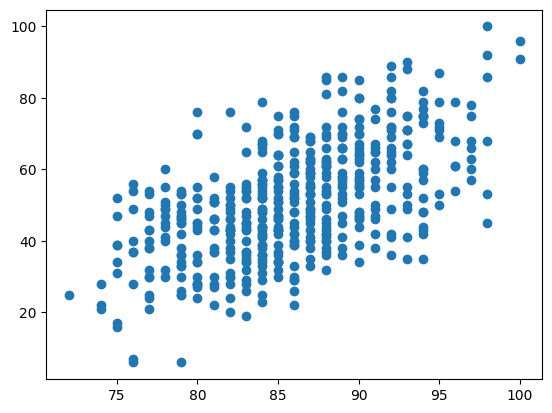

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.rides, df.overall)
plt.show()

# rides와 overall은 양의 상관관계가 있는 것으로 보임

In [ ]:
#공분산(Covariance): 두 변수의 상관정도를 나타내는 값, 두 변수가 같은 방향으로 움직이는 정도

#  x의 편차와 y의 편차를 곱한 값의 평균값

# X 증가 => y 증가 => 양수
# X 증가 => y 감소 => 음수

# 공분산이 0이면 두 변수는 선형관계가 없음

In [8]:
import numpy as np

np.cov(df.overall, df.rides)[0,1]

# 양수이므로 양의 상관관계임
# 공분산은 증가, 감소 방향을 이해할 수는 있으나 어느 정도의 상관관계인지 파악하기는 어려움

50.82939078156313

In [10]:
print(np.cov([1,2,3,4,5], [2,3,4,5,6])[0,1])  # x,y가 같은 방향으로 증가하므로 양수
print(np.cov([1,2,3,4,5], [3,3,3,3,3])[0,1])  # x의 변화에 y가 영향을 받지 않으므로 0

2.5
0.0


In [11]:
print(np.cov([1,2,3,4,5], [5,4,3,2,1])[0,1])  # x,y의 증가 방향이 다르므로 음수
print(np.cov([10,20,30,40,50], [5,4,3,2,1])[0,1])

# 공분산은 변수의 단위에 크게 영향을 받는 단점이 있음.
# 이것을 보완하기 위해 공분산을 표준화시킨 상관계수를 사용함

-2.5
-25.0


In [ ]:
#상관계수 :  X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도

# 공분산을 표준편차의 곱으로 나눈 값(-1 ~ 1)

# +1 : 완벽한 양의 상관관계, -1 : 완벽한 음의 상관관계

# 0 : 선형관계가 없음

# 피어슨 상관계수: 일반적으로 사용되는 방법, 숫자형-숫자형 변수, 정규분포인 경우 정확한 결과를 얻을 수 있음, 이상치에 민감함

# 스피어만 상관계수: 서열척도의 경우 사용

#   직선관계가 아니어도 상관관계가 있으면 1에 가까운 값을 갖게 됨

# 상관분석은 선형관계를 설명할 수는 있으나 인과관계(원인과 결과)를 설명하기는 어려움

# 원인과 결과를 설명하려면 회귀분석을 사용해야 함

In [12]:
print(np.corrcoef([1,2,3,4,5], [5,4,3,2,1])[0,1])  
print(np.corrcoef([10,20,30,40,50], [5,4,3,2,1])[0,1])

-0.9999999999999999
-1.0


In [13]:
import numpy as np

X=np.array([[169,70],[172,68],[175,78],[163,58],[180,80],[159,76],[158,52],[173,69],[180,75],[155,50],[187,90],[170,66]])
m=np.mean(X,axis=0)                    

# rowvar row가 variable이 아님, column variable
cv=np.cov(X,rowvar=False) #공분산

#다변수 정규분포 랜덤 샘플
gan=np.random.multivariate_normal(m,cv,5)    
print(gan)

[[175.42802856  78.90671455]
 [155.3110864   54.80499002]
 [170.80952374  74.79321101]
 [156.76522533  51.77614273]
 [166.77450804  60.21357876]]


In [14]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()    # 데이터셋 구성

X=x_train[np.isin(y_train,[7])]                # class 7 선택
X=X.reshape((X.shape[0],28*28))

m=np.mean(X,axis=0)                    
cv=np.cov(X,rowvar=False)
gan=np.random.multivariate_normal(m,cv,5)

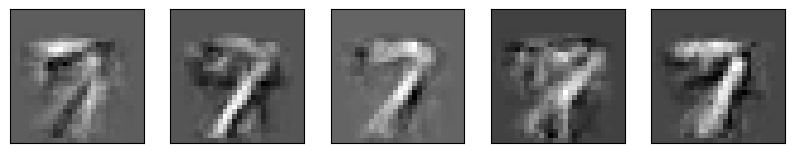

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))                

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(gan[i].reshape((28,28)),cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()